In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm
from collections import Counter
%matplotlib inline

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-datasetdog-cat-and-panda


In [8]:
print(os.listdir(path))

['animals', 'images']


In [9]:
import os

# Set the correct animals path
path = os.path.join(path, "animals")

# Only include valid class names
valid_classes = ['cats', 'dogs', 'panda']
classNames = [name for name in os.listdir(path) if name in valid_classes]

print("Class Names:", classNames)



Class Names: ['dogs', 'panda', 'cats']


In [10]:
classNames = os.listdir(path)
classNames


['animals', 'images', 'dogs', 'panda', 'cats']

In [11]:
import os
import cv2
from tqdm import tqdm

images = []
classNames = os.listdir(path)

for label, className in enumerate(classNames):
    classPath = os.path.join(path, className)
    for img_name in tqdm(os.listdir(classPath)):
        img_path = os.path.join(classPath, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            # Skip unreadable images
            print(f"Skipped: {img_path}")
            continue
        resizeImage = cv2.resize(image, (32, 32))
        images.append([resizeImage, label])


100%|██████████| 3/3 [00:00<00:00, 939.72it/s]


Skipped: /kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs
Skipped: /kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/panda
Skipped: /kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/cats


100%|██████████| 1000/1000 [00:01<00:00, 538.89it/s]


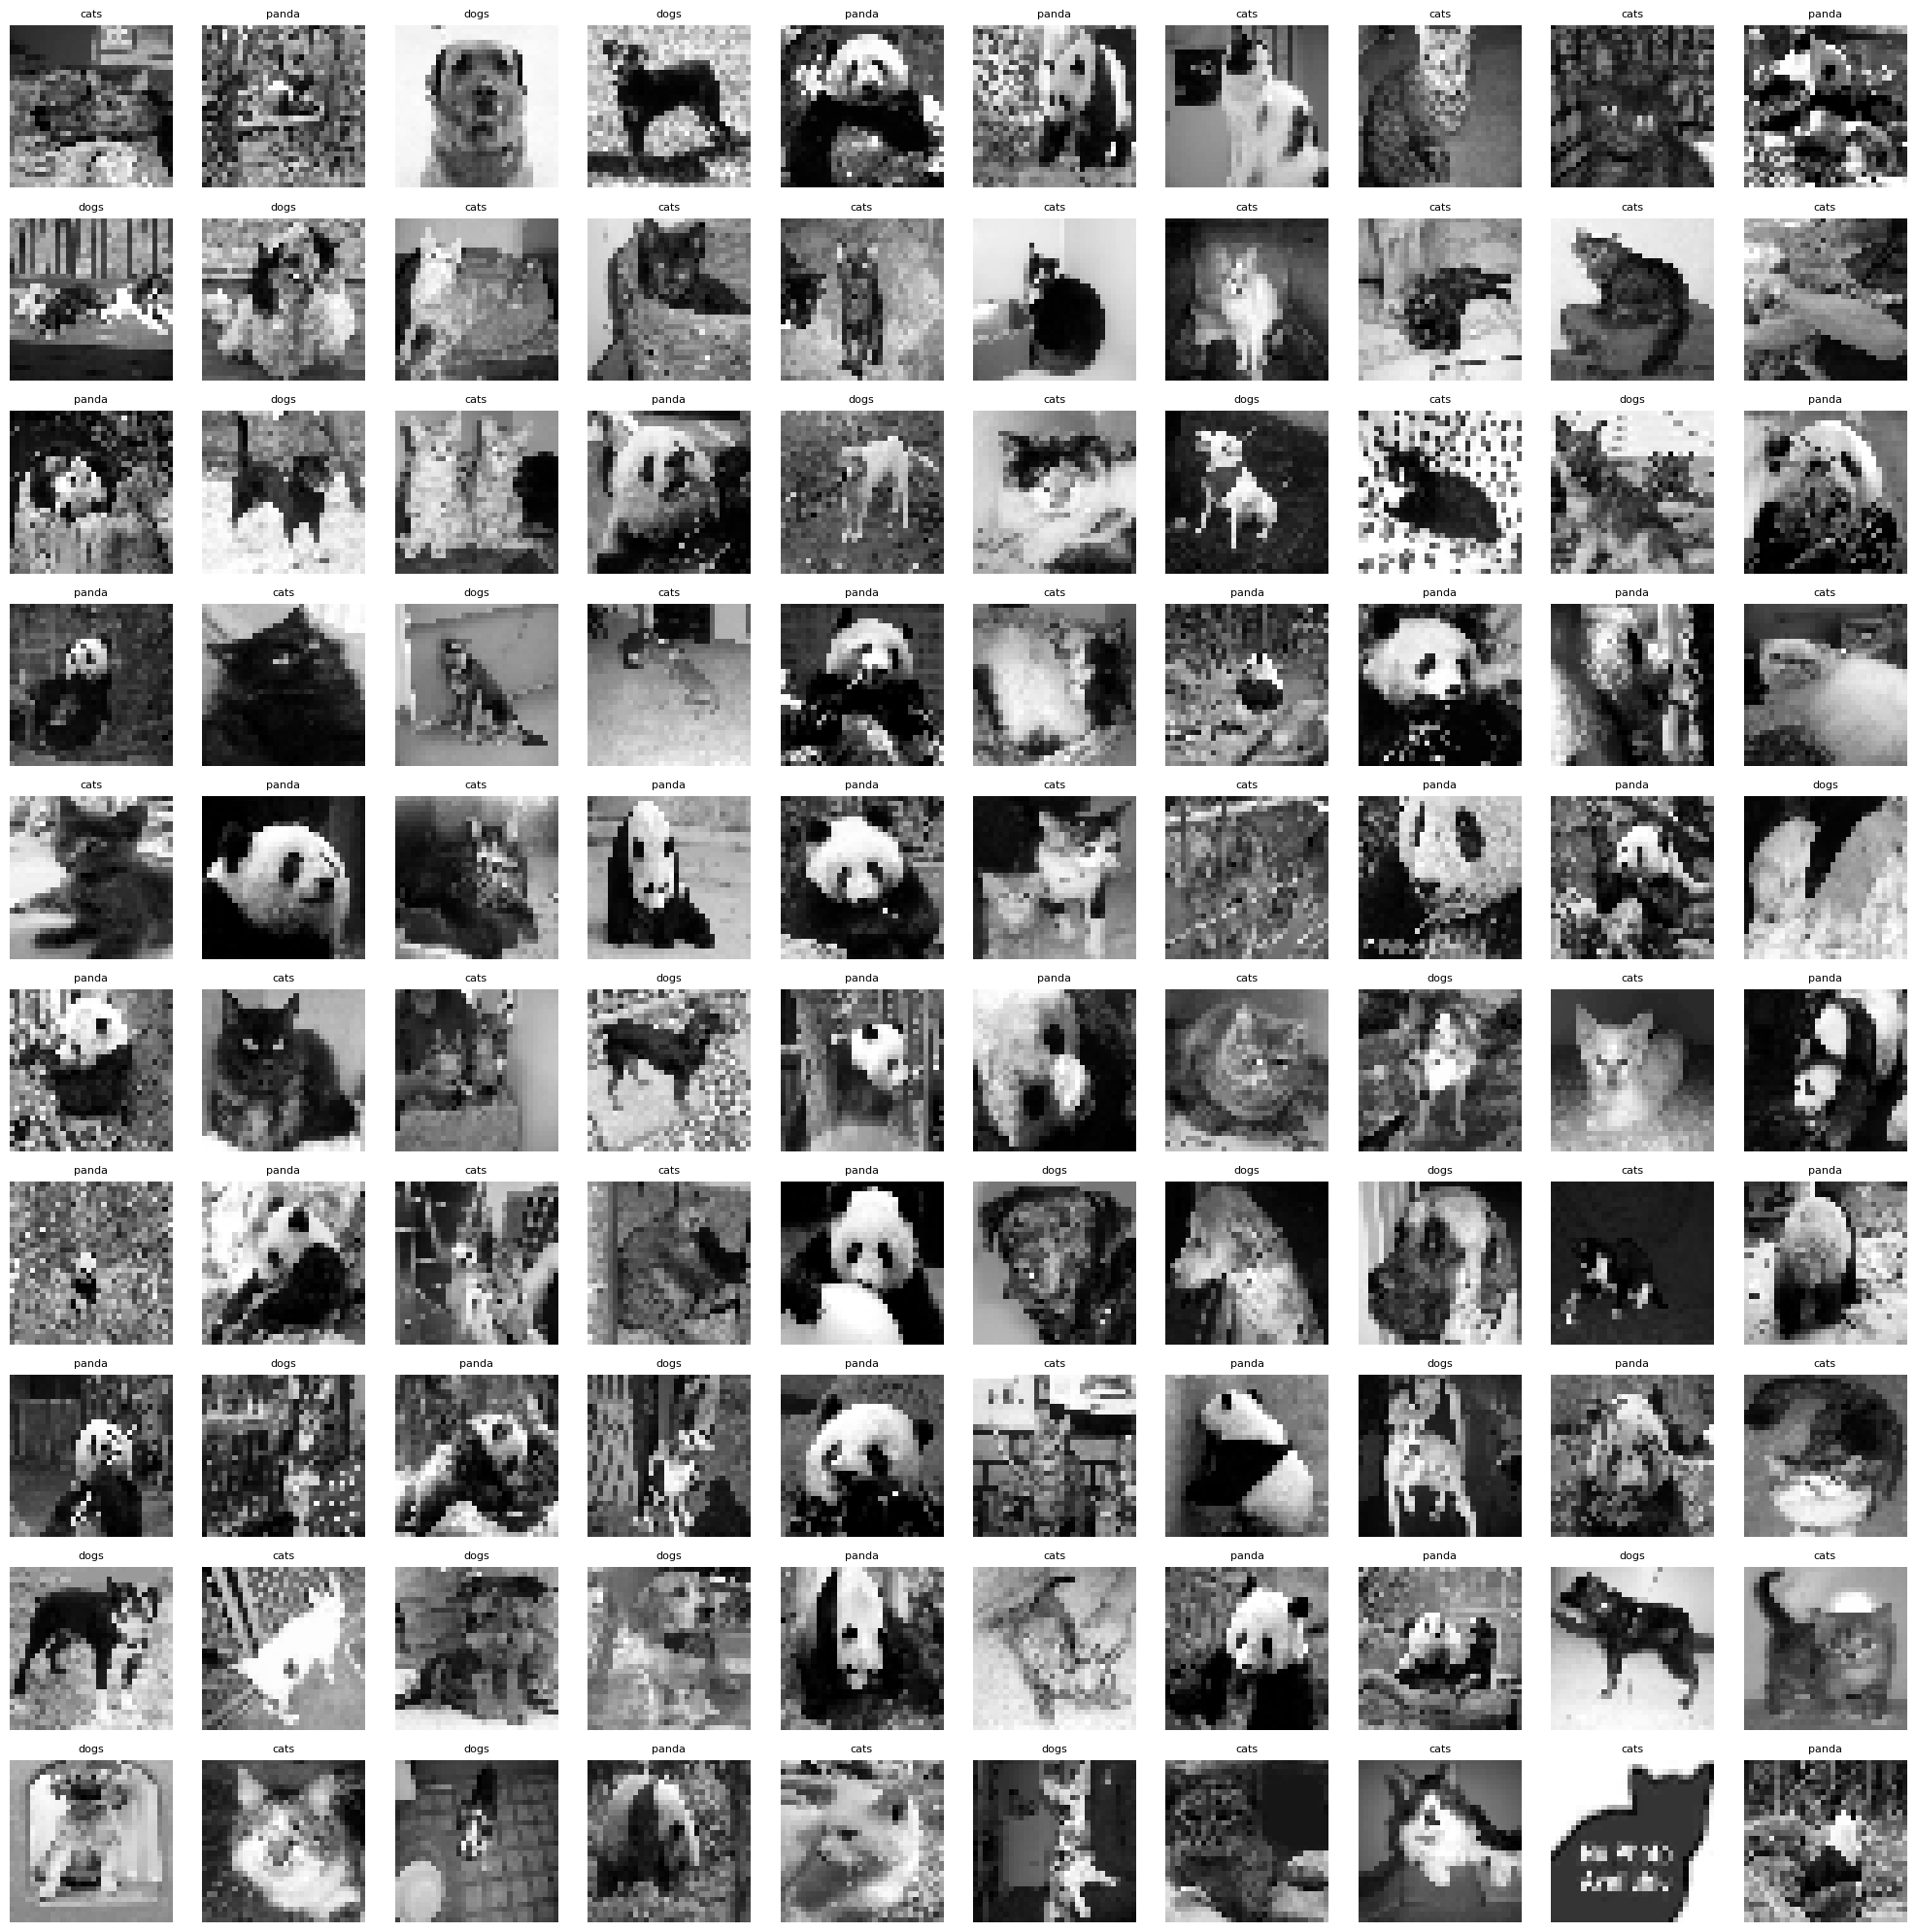

In [15]:
# Shuffle and select 100 images
random.shuffle(images)
sample_images = images[:100]

# Plot 100 images in 10x10 grid
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(sample_images[i][0], cmap='gray')
    plt.axis("off")
    plt.title(classNames[sample_images[i][1]], fontsize=8)
plt.tight_layout()
plt.show()


In [16]:
len(images)

3003

In [26]:

f1 = images[0:20]
f2 = images[20:40]
f3 = images[40:60]
f4 = images[60:80]
f5 = images[80:100]
folds = [f1, f2, f3, f4, f5]


In [27]:


def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def manhattan_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))



In [29]:

def predict(query_image,train_data,k,dis_matrix):
    distances = []
    for image, label in train_data:
        if dis_matrix =='e':
            distance = euclidean_distance(query_image[0], image)
            distances.append((distance,label))
        else:
            distance = manhattan_distance(query_image[0], image)
            distances.append((distance,label))

    distances.sort(key= lambda x : x[0])
    k_nearst_label = [label for _, label in distances[:k]]
    major_label = Counter(k_nearst_label).most_common(1)[0][0]
    return major_label


In [30]:

def pred_accuracy(train_folds, validation_fold, k, dis_matrix):
    right_pred = 0
    train_data = [fold for folds in train_folds for fold in folds]
    for image, label in validation_fold:
        pred_label = predict(image,train_data,k,dis_matrix)
        if pred_label == label:
            right_pred +=1
    total_pred = len(validation_fold)
    accuracy = right_pred/total_pred
    return accuracy


In [31]:
def cross_val(folds,k,dis_matrix):
    accuracies = []
    for i in range(5):
        validation_fold = folds[i]
        train_folds = [fold for j, fold in enumerate(folds) if j != i]
        accuracy = pred_accuracy(train_folds, validation_fold, k,dis_matrix)
        accuracies.append(accuracy)
        print(f"Fold {i+1} Accuracy: {accuracy * 100:.2f}%")
    return accuracies



In [32]:
k_values = range(1, 21)
eu_accuracies = []
mn_accuracies = []


In [33]:
print('Euclidean Distance:')
for k in k_values:
    print(f'Accuracy for k={k}:')
    eu_accuracies.append(cross_val(folds,k,'e'))

Euclidean Distance:
Accuracy for k=1:
Fold 1 Accuracy: 35.00%
Fold 2 Accuracy: 30.00%
Fold 3 Accuracy: 40.00%
Fold 4 Accuracy: 40.00%
Fold 5 Accuracy: 45.00%
Accuracy for k=2:
Fold 1 Accuracy: 35.00%
Fold 2 Accuracy: 30.00%
Fold 3 Accuracy: 40.00%
Fold 4 Accuracy: 40.00%
Fold 5 Accuracy: 45.00%
Accuracy for k=3:
Fold 1 Accuracy: 55.00%
Fold 2 Accuracy: 40.00%
Fold 3 Accuracy: 40.00%
Fold 4 Accuracy: 15.00%
Fold 5 Accuracy: 50.00%
Accuracy for k=4:
Fold 1 Accuracy: 50.00%
Fold 2 Accuracy: 30.00%
Fold 3 Accuracy: 35.00%
Fold 4 Accuracy: 25.00%
Fold 5 Accuracy: 35.00%
Accuracy for k=5:
Fold 1 Accuracy: 50.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 50.00%
Fold 4 Accuracy: 30.00%
Fold 5 Accuracy: 35.00%
Accuracy for k=6:
Fold 1 Accuracy: 50.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 30.00%
Fold 4 Accuracy: 25.00%
Fold 5 Accuracy: 30.00%
Accuracy for k=7:
Fold 1 Accuracy: 40.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 25.00%
Fold 4 Accuracy: 25.00%
Fold 5 Accuracy: 30.00%
Accuracy for k

In [34]:
print('Manhattan Distance:')
for k in k_values:
    print(f'Accuracy for k={k}:')
    mn_accuracies.append(cross_val(folds,k,'m'))

Manhattan Distance:
Accuracy for k=1:
Fold 1 Accuracy: 50.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 30.00%
Fold 4 Accuracy: 45.00%
Fold 5 Accuracy: 35.00%
Accuracy for k=2:
Fold 1 Accuracy: 50.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 30.00%
Fold 4 Accuracy: 45.00%
Fold 5 Accuracy: 35.00%
Accuracy for k=3:
Fold 1 Accuracy: 25.00%
Fold 2 Accuracy: 55.00%
Fold 3 Accuracy: 35.00%
Fold 4 Accuracy: 45.00%
Fold 5 Accuracy: 35.00%
Accuracy for k=4:
Fold 1 Accuracy: 40.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 20.00%
Fold 4 Accuracy: 35.00%
Fold 5 Accuracy: 40.00%
Accuracy for k=5:
Fold 1 Accuracy: 30.00%
Fold 2 Accuracy: 50.00%
Fold 3 Accuracy: 25.00%
Fold 4 Accuracy: 25.00%
Fold 5 Accuracy: 40.00%
Accuracy for k=6:
Fold 1 Accuracy: 30.00%
Fold 2 Accuracy: 55.00%
Fold 3 Accuracy: 30.00%
Fold 4 Accuracy: 35.00%
Fold 5 Accuracy: 30.00%
Accuracy for k=7:
Fold 1 Accuracy: 40.00%
Fold 2 Accuracy: 45.00%
Fold 3 Accuracy: 25.00%
Fold 4 Accuracy: 30.00%
Fold 5 Accuracy: 45.00%
Accuracy for k

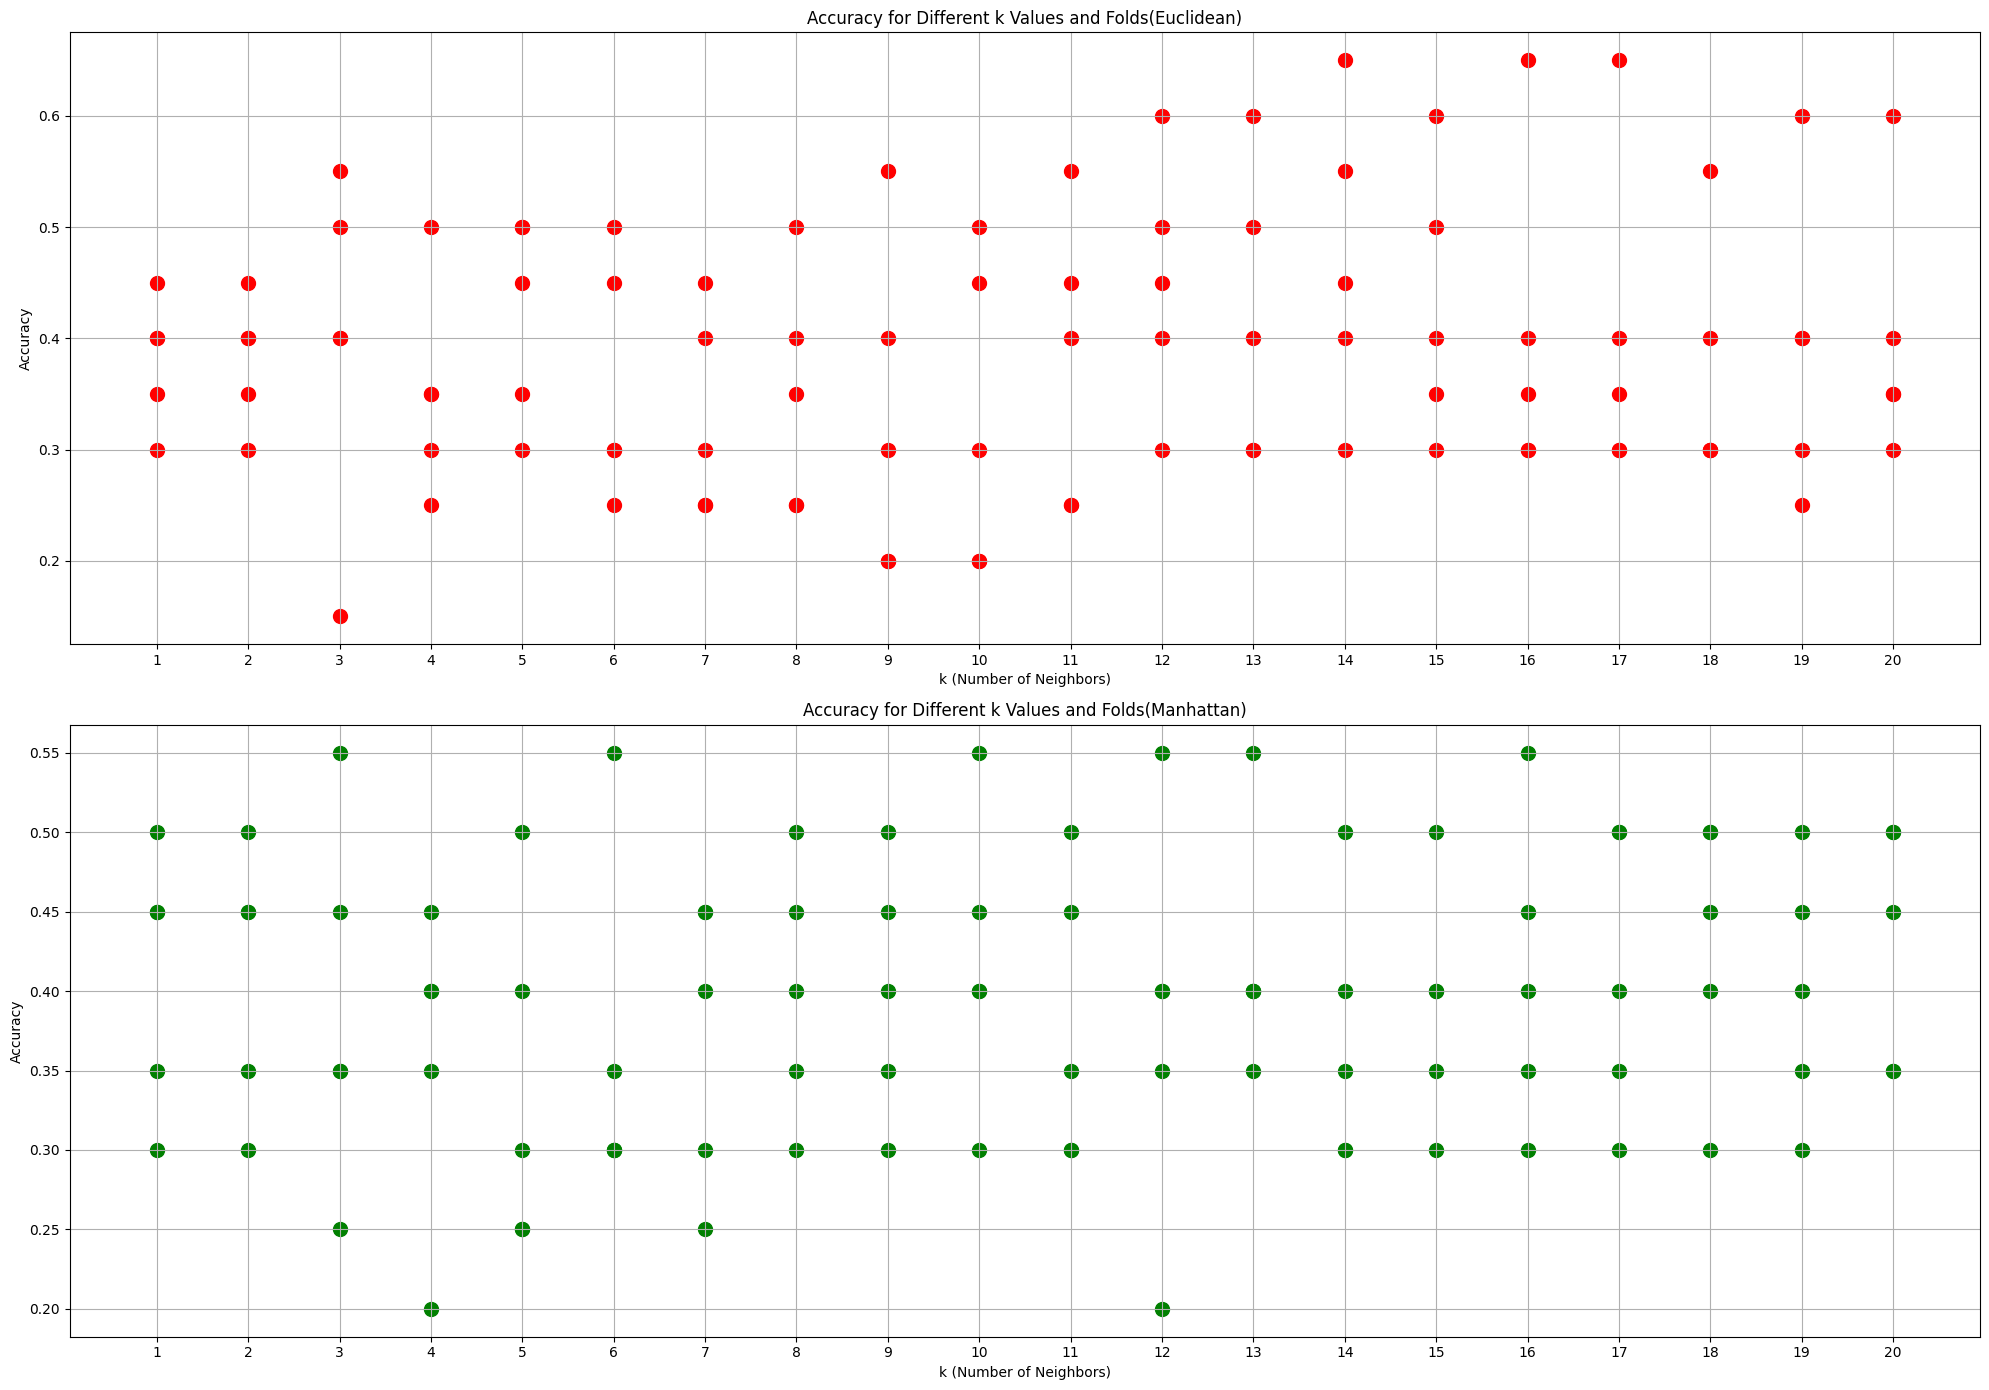

In [35]:
# Convert accuracies to a NumPy array for easier manipulation
eu_accuracies = np.array(eu_accuracies)
mn_accuracies = np.array(mn_accuracies)

plt.figure(figsize=(20, 14))


# Plotting scatter plot for each k value
for i, k in enumerate(k_values):
    plt.subplot(2,1,1)
    plt.scatter([k] * eu_accuracies.shape[1], eu_accuracies[i], color='red', label=f'k={k}', s=100)

# Plot configurations
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values and Folds(Euclidean)')
plt.xticks(k_values)
plt.grid(True)

for i, k in enumerate(k_values):
    plt.subplot(2,1,2)
    plt.scatter([k] * mn_accuracies.shape[1], mn_accuracies[i], color='green', label=f'k={k}', s=100)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values and Folds(Manhattan)')
plt.xticks(k_values)
plt.grid(True)


plt.tight_layout()
plt.show()


In [37]:
print(f'Avarage accuracey of Euclidean Distance : {np.average(eu_accuracies)*100:.3f}%')
print(f'Avarage accuracey of Manhattan Distance : {np.average(mn_accuracies)*100:.3f}%')

Avarage accuracey of Euclidean Distance : 38.700%
Avarage accuracey of Manhattan Distance : 39.400%


In [38]:
test_images = random.sample(images, 5)

Top predictions for image 1: ['dogs', 'cats', 'panda']
Top predictions for image 2: ['panda', 'dogs']
Top predictions for image 3: ['cats', 'dogs', 'panda']
Top predictions for image 4: ['cats', 'dogs', 'panda']
Top predictions for image 5: ['dogs', 'cats', 'panda']


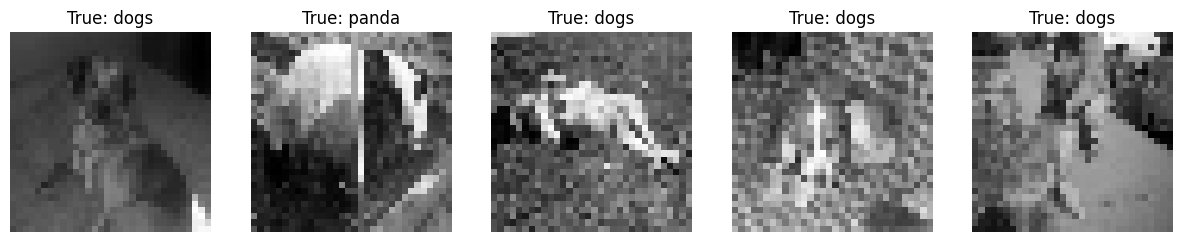

In [39]:
plt.figure(figsize=(15, 7))
for i, (query_image, true_label) in enumerate(test_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(query_image, cmap='gray')
    plt.axis("off")
    plt.title(f"True: {classNames[true_label]}")

    distances = []
    for image, label in images:
        distance = manhattan_distance(query_image, image)
        distances.append((distance, label))


    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:10]]


    top_5_labels = Counter(k_nearest_labels).most_common(5)

    top_5_classnames = [classNames[label] for label, _ in top_5_labels]

    print(f"Top predictions for image {i+1}: {top_5_classnames}")

plt.show()

**Discussion:**
In this study, we compared Euclidean (L2) and Manhattan (L1) distances for image classification using a grayscale animal image dataset. The Euclidean Distance achieved an average accuracy of 38.7%, while the Manhattan Distance performed slightly better with an accuracy of 39.4%.

Despite the small difference in accuracy, Manhattan distance was slightly more effective. This could be due to its robustness against small pixel value variations, which is beneficial in datasets with discrete features like grayscale images. The dataset’s simple grayscale images may not have rich enough features, which could explain the relatively low performance of both distance metrics.

Limitations and Potential Improvements:
Feature Enhancement: Using more advanced features like HOG or deep learning-based features could improve accuracy.

Dimensionality Reduction: Techniques like PCA could help reduce the feature space and improve classification.

Data Augmentation: Increasing the dataset size via augmentation could help improve model performance.

Overall, the results show that while both metrics work similarly, there is room for improvement with more sophisticated techniques.